#### O objetivo deste notebook é fazer um estudo a respeito de informações e estatísticas dos jogadores da NBA.
#### A ideia é mostrar como os jogadores estão distribuídos em diferentes posições, que são influenciadas por suas características físicas e estilo de jogo. Além disso, podemos observar como o esporte foi mudando ao longo dos anos, bem como o biotipo dos jogadores que fizeram/fazem parte da liga.
#### Ao final, o intuito é tentar prever a posição de cada jogador, a partir de suas informações e do ano de referência.
#### Obs.: Os dados foram retirados do site Basketball Reference e o script para sua obtenção pode ser visto no notebook BR-web_scraping.ipynb.

In [63]:
# Importação das bibliotecas utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Entendendo os dados
#### No primeiro momento, os dados utilizados serão as estatísticas referentes aos jogos:

In [2]:
game_stats = pd.read_csv('players_game_stats.csv')
game_stats

,Id,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,abdulka01,Kareem Abdul-Jabbar,C,32,LAL,82,38.3,10.2,16.9,0.604,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,abernto01,Tom Abernethy,PF,25,GSW,67,18.2,2.3,4.7,0.481,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,adamsal01,Alvan Adams,C,25,PHO,75,28.9,6.2,11.7,0.531,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,architi01,Tiny Archibald,PG,31,BOS,80,35.8,4.8,9.9,0.482,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,awtrede01,Dennis Awtrey,C,31,CHI,26,21.5,1.0,2.3,0.450,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17678,wrighde01,Delon Wright,SG-PG,28,TOT,63,27.7,3.8,8.2,0.463,...,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
17679,youngth01,Thaddeus Young,PF,32,CHI,68,24.3,5.4,9.7,0.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
17680,youngtr01,Trae Young,PG,22,ATL,63,33.7,7.7,17.7,0.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
17681,zelleco01,Cody Zeller,C,28,CHO,48,20.9,3.8,6.8,0.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


#### Ao fazer a captura dos dados, aproveitei para já fazer o tratamento da informação, mas ainda há um caso que necessita de ajuste: na coluna de posição ('Pos'), alguns casos aparecem com dois registros. 

In [3]:
game_stats.groupby('Pos').Player.count().sort_values(ascending=False)

Pos
PF       3641
C        3582
SG       3534
PG       3372
SF       3308
SF-SG      36
PG-SG      31
SG-SF      30
PF-SF      30
PF-C       30
C-PF       30
SG-PG      29
SF-PF      24
SG-PF       4
SF-C        1
PG-SF       1
Name: Player, dtype: int64

#### O esperado era que apenas 5 tipos diferentes fossem encontrados: PG (Point Guard), SG (Shooting Guard), SF (Small Forward), PF (Power Forward) e C (Center).
#### Para tratar essa informação, considerarei apenas a chamada "posição primária", ou seja, a primeira das posições que aparecem.

In [4]:
game_stats['Pos'] = [p[0] for p in game_stats['Pos'].str.split('-')]

#### Agora:

In [5]:
game_stats.groupby('Pos').Player.count()

Pos
C     3612
PF    3701
PG    3404
SF    3369
SG    3597
Name: Player, dtype: int64

#### Com o devido tratamento, é possível começar a entender como as estatísticas mudam de acordo com a posição dos atletas.
#### Iniciando pelo número de rebotes pegos em média por partida.

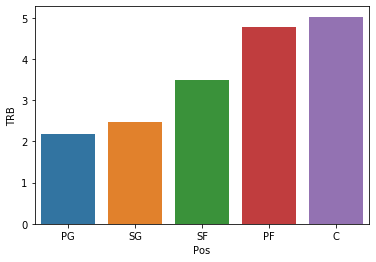

In [6]:
reb_mean = game_stats.groupby('Pos').TRB.mean().sort_values()
sns.barplot(data=reb_mean.reset_index(), x='Pos', y='TRB')

#### Da mesma forma, o número de assistências mostra um comportamento interessante para essa análise:

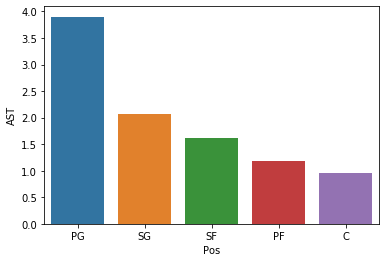

In [7]:
ast_mean = game_stats.groupby('Pos').AST.mean().sort_values(ascending=False)
sns.barplot(data=ast_mean.reset_index(), x='Pos', y='AST')

#### É perceptível que os números assistências e rebotes são "inversamente proporcionais" de acordo com as posições dos atletas.

#### Outras estatísticas que mostram comportamento parecido entre si são os números de bolas de 3 acertadas e tocos por jogo:

/Users/luiz.leao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


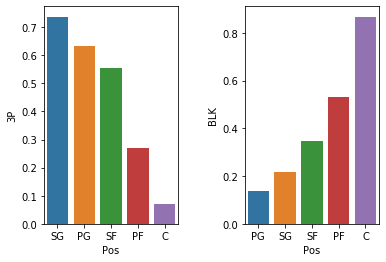

In [8]:
t_mean = game_stats.groupby('Pos')['3P'].mean().sort_values(ascending=False)
blk_mean = game_stats.groupby('Pos').BLK.mean().sort_values()


fig, ax = plt.subplots(1,2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
sns.barplot(data=t_mean.reset_index(), x='Pos', y='3P', ax=ax[0])
sns.barplot(data=blk_mean.reset_index(), x='Pos', y='BLK', ax=ax[1])
fig.show()

#### Essa análise inicial serviu para mostrar que jogadores de diferentes posições possuem números distintos (em média) para cada atributo, sendo possível entender um padrão.
#### Dessa forma, se mostra interessante a utilização de modelos estatísticos para tentar prever a posição de cada jogador a partir desses números.

## Pré-processamento

#### Existem alguns dados discrepantes na base, vamos atrás deles:

In [9]:
game_stats['FG%'].max()

1.0

In [10]:
game_stats['FT%'].max()

1.0

#### Os valores acima se referem a jogadores que acertaram 100% dos arremessos de quadra (FG%) ou dos lances livres (FT%).
#### Isso não é comum para jogadores com presença relevante em quadra, como podemos observar:

In [11]:
game_stats[game_stats['FG%']==1.0][['Player', 'G', 'MP', 'FG', 'FGA', 'FG%']]

,Player,G,MP,FG,FGA,FG%
597,Carl Bailey,1,7.0,1.0,1.0,1.0
1383,Steve Lingenfelter,3,4.7,0.3,0.3,1.0
1386,Darrell Lockhart,2,7.0,1.0,1.0,1.0
2364,Cozell McQueen,3,2.3,1.0,1.0,1.0
2533,Kent Benson,2,6.0,1.0,1.0,1.0
2710,Tod Murphy,1,19.0,1.0,1.0,1.0
3439,Chuck Nevitt,3,3.0,0.7,0.7,1.0
3783,Ian Lockhart,1,2.0,1.0,1.0,1.0
4506,Dave Hoppen,2,5.0,0.5,0.5,1.0
4787,Chucky Brown,1,10.0,1.0,1.0,1.0


In [12]:
game_stats[game_stats['FT%']==1.0][['Player', 'G', 'MP', 'FT', 'FTA', 'FT%']]

,Player,G,MP,FT,FTA,FT%
61,Terry Crosby,4,7.0,0.5,0.5,1.0
91,Walt Frazier,3,9.0,0.7,0.7,1.0
156,Arvid Kramer,8,5.6,0.3,0.3,1.0
258,Andre Wakefield,8,5.9,0.4,0.4,1.0
286,Tony Zeno,8,7.4,0.3,0.3,1.0
...,...,...,...,...,...,...
17561,Jahmi'us Ramsey,13,7.2,0.4,0.4,1.0
17593,Jay Scrubb,4,21.0,1.3,1.3,1.0
17607,Tony Snell,47,21.1,0.2,0.2,1.0
17621,Isaiah Thomas,3,16.0,0.7,0.7,1.0


#### É possível perceber que jogadores com aproveitamentos tão bons nesses fundamentos jogaram poucos jogos ou poucos minutos.
#### Assim, para que não ocorram distorções, podemos filtrar a base inicial para considerar um valor mínimo para quantidade de jogos e minutos jogados por partida

In [13]:
game_stats = game_stats[(game_stats.G >= 20) & (game_stats.MP >= 15.0)]

#### Após esse processamento:

In [14]:
game_stats[game_stats['FG%']==1.0][['Player', 'G', 'MP', 'FG', 'FGA', 'FG%']].head(10)

,Player,G,MP,FG,FGA,FG%


In [15]:
game_stats[game_stats['FT%']==1.0][['Player', 'G', 'MP', 'FT', 'FTA', 'FT%']].head(10)

,Player,G,MP,FT,FTA,FT%
6289,Brent Price,25,15.6,0.8,0.8,1.0
6422,Mahmoud Abdul-Rauf,31,17.1,0.5,0.5,1.0
7076,Rusty LaRue,43,17.0,0.4,0.4,1.0
8765,Tom Gugliotta,27,16.6,0.3,0.3,1.0
15996,Kobi Simmons,32,20.1,0.8,0.8,1.0
17072,Tony Snell,59,27.8,0.5,0.5,1.0
17607,Tony Snell,47,21.1,0.2,0.2,1.0


#### No caso dos jogadores com 100% de precisão dos arremessos de quadra, todos foram retirados da base.
#### Já para os que estiveram perfeitos da linha de lance livre, não foi possível retirar todos da análise, mas a quantidade reduziu consideravelmente, saindo de 400 para apenas 8.
#### A base ajustada ficou:

In [16]:
game_stats

,Id,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,abdulka01,Kareem Abdul-Jabbar,C,32,LAL,82,38.3,10.2,16.9,0.604,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,abernto01,Tom Abernethy,PF,25,GSW,67,18.2,2.3,4.7,0.481,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,adamsal01,Alvan Adams,C,25,PHO,75,28.9,6.2,11.7,0.531,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,architi01,Tiny Archibald,PG,31,BOS,80,35.8,4.8,9.9,0.482,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,awtrede01,Dennis Awtrey,C,31,CHI,26,21.5,1.0,2.3,0.450,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17678,wrighde01,Delon Wright,SG,28,TOT,63,27.7,3.8,8.2,0.463,...,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
17679,youngth01,Thaddeus Young,PF,32,CHI,68,24.3,5.4,9.7,0.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
17680,youngtr01,Trae Young,PG,22,ATL,63,33.7,7.7,17.7,0.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
17681,zelleco01,Cody Zeller,C,28,CHO,48,20.9,3.8,6.8,0.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


#### Para a primeira análise preditiva, algumas informações presentes no DataFrame não são necessárias, como o nome do jogador, o ano de referência dos dados, bem como o número de jogos (devido ao filtro feito) e o time pelo qual o jogador jogou no ano de referência.
#### Além disso, é preciso separar a variável "target" das demais.

In [17]:
y_players = game_stats['Pos']
y_players

0         C
1        PF
2         C
3        PG
4         C
         ..
17678    SG
17679    PF
17680    PG
17681     C
17682     C
Name: Pos, Length: 11160, dtype: object

In [18]:
X_players = game_stats.drop(['Id', 'Player','Pos', 'Tm', 'G', 'Season'], axis=1)
X_players

,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,32,38.3,10.2,16.9,0.604,0.0,0.0,0.000,10.2,16.9,...,0.765,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8
1,25,18.2,2.3,4.7,0.481,0.0,0.0,0.000,2.3,4.7,...,0.683,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4
2,25,28.9,6.2,11.7,0.531,0.0,0.0,0.000,6.2,11.6,...,0.797,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9
3,31,35.8,4.8,9.9,0.482,0.1,0.2,0.222,4.7,9.7,...,0.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
4,31,21.5,1.0,2.3,0.450,0.0,0.0,0.000,1.0,2.3,...,0.640,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17678,28,27.7,3.8,8.2,0.463,1.0,2.7,0.372,2.8,5.5,...,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
17679,32,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
17680,22,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
17681,28,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


#### Após essa primeira etapa de pré-processamento, um passo importante é a normalização das variáveis explicativas e a codificação da variável resposta.

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_players)
pd.DataFrame(X_scaled, columns=X_players.columns)

,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.583333,0.811847,0.753846,0.594796,0.670807,0.000000,0.000000,0.000,0.769231,0.618868,...,0.735658,0.328571,0.675214,0.563536,0.305556,0.270270,0.607143,0.625000,0.500000,0.658333
1,0.291667,0.111498,0.146154,0.141264,0.416149,0.000000,0.000000,0.000,0.161538,0.158491,...,0.643420,0.128571,0.111111,0.127072,0.083333,0.135135,0.035714,0.089286,0.318182,0.119444
2,0.291667,0.484321,0.446154,0.401487,0.519669,0.000000,0.000000,0.000,0.461538,0.418868,...,0.771654,0.300000,0.461538,0.414365,0.291667,0.378378,0.125000,0.500000,0.636364,0.383333
3,0.541667,0.724739,0.338462,0.334572,0.418219,0.018868,0.015152,0.222,0.346154,0.347170,...,0.808774,0.100000,0.094017,0.104972,0.576389,0.351351,0.017857,0.517857,0.522727,0.361111
4,0.541667,0.226481,0.046154,0.052045,0.351967,0.000000,0.000000,0.000,0.061538,0.067925,...,0.595051,0.157143,0.230769,0.209945,0.097222,0.135135,0.107143,0.160714,0.477273,0.061111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,0.416667,0.442509,0.261538,0.271375,0.378882,0.188679,0.204545,0.372,0.200000,0.188679,...,0.777278,0.142857,0.222222,0.204420,0.298611,0.432432,0.089286,0.214286,0.181818,0.252778
11156,0.583333,0.324042,0.384615,0.327138,0.577640,0.037736,0.053030,0.267,0.392308,0.324528,...,0.581552,0.357143,0.273504,0.309392,0.291667,0.297297,0.107143,0.339286,0.409091,0.305556
11157,0.166667,0.651568,0.561538,0.624535,0.327122,0.415094,0.477273,0.343,0.415385,0.407547,...,0.871766,0.085714,0.230769,0.182320,0.645833,0.216216,0.035714,0.714286,0.318182,0.672222
11158,0.416667,0.205575,0.261538,0.219331,0.577640,0.018868,0.045455,0.143,0.269231,0.215094,...,0.678290,0.357143,0.324786,0.342541,0.118056,0.162162,0.071429,0.178571,0.477273,0.230556


In [20]:
encoder = OneHotEncoder()
encoder.fit(y_players.values.reshape(-1, 1))
y_enc = encoder.transform(y_players.values.reshape(-1, 1)).toarray()

#### Após as transformações, podemos treinar o modelo

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y_enc,
                                                random_state=1)

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
y_model = knn.predict(Xtest)

In [23]:
accuracy_score(ytest, y_model)

0.5849462365591398

#### O melhor resultado apresentado pelo modelo foi uma acurácia de 58,5%.

## Aprimoramento do Modelo 1

#### Podemos tentar melhorar esse resultado acrescentando algumas informações.

#### Também no Basketball Reference, busquei os dados sobre peso e altura de cada jogador. 

In [24]:
ht_wt = pd.read_csv('players_height_weight.csv')
ht_wt

,Id,Player,Height,Weight
0,abdelal01,Alaa Abdelnaby,208,108
1,abdulza01,Zaid Abdul-Aziz,206,106
2,abdulka01,Kareem Abdul-Jabbar,218,102
3,abdulma02,Mahmoud Abdul-Rauf,185,73
4,abdulta01,Tariq Abdul-Wahad,198,101
...,...,...,...,...
5013,zizican01,Ante Žižić,208,120
5014,zoetji01,Jim Zoet,216,108
5015,zopfbi01,Bill Zopf,185,77
5016,zubaciv01,Ivica Zubac,213,108


#### Podemos agregar esses dados à tabela original e observar como eles se comportam

#### Primeiro, retirando a coluna 'Player' para não gerar redundância

In [25]:
ht_wt = ht_wt.drop('Player', axis=1)
ht_wt

,Id,Height,Weight
0,abdelal01,208,108
1,abdulza01,206,106
2,abdulka01,218,102
3,abdulma02,185,73
4,abdulta01,198,101
...,...,...,...
5013,zizican01,208,120
5014,zoetji01,216,108
5015,zopfbi01,185,77
5016,zubaciv01,213,108


#### Realizando o merge

In [83]:
df_total = pd.merge(game_stats, ht_wt, on='Id').sort_values(['Season', 'Player'])
df_total

,Id,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Height,Weight
411,jeelaab01,Abdul Jeelani,SF,25,POR,77,16.7,3.7,7.3,0.510,...,3.5,1.2,0.5,0.5,1.5,2.0,9.6,1980,203,95
195,dantlad01,Adrian Dantley,SF,24,UTA,68,39.3,10.7,18.6,0.576,...,7.6,2.8,1.4,0.2,3.4,3.1,28.0,1980,196,94
272,englial01,Alex English,SF,26,TOT,78,30.8,7.1,14.3,0.497,...,7.8,2.9,0.9,0.8,2.7,2.6,16.9,1980,203,86
94,bristal01,Allan Bristow,SF,28,UTA,82,28.1,4.6,9.6,0.480,...,6.2,4.2,1.1,0.1,2.2,2.6,11.6,1980,201,95
535,leaveal01,Allen Leavell,PG,22,HOU,77,27.6,4.3,8.5,0.503,...,2.4,5.4,1.6,0.4,2.7,2.6,10.9,1980,185,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,caulewi01,Willie Cauley-Stein,C,27,DAL,53,17.1,2.2,3.4,0.632,...,4.5,0.7,0.4,0.8,0.5,2.4,5.3,2021,213,108
10595,hernawi01,Willy Hernangómez,C,26,NOP,47,18.0,3.2,5.7,0.563,...,7.1,1.1,0.5,0.5,0.7,1.4,7.8,2021,211,113
11151,tillmxa01,Xavier Tillman Sr.,PF,22,MEM,59,18.4,2.8,5.1,0.559,...,4.3,1.3,0.7,0.6,0.8,2.0,6.6,2021,203,111
10225,lavinza01,Zach LaVine,SG,25,CHI,58,35.1,9.8,19.4,0.507,...,5.0,4.9,0.8,0.5,3.5,2.4,27.4,2021,196,90


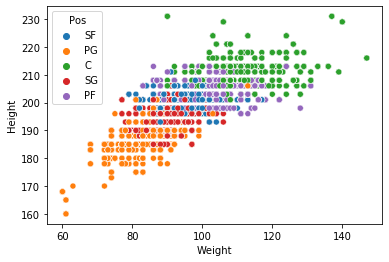

In [27]:
sns.scatterplot(data=df_total, x='Weight', y='Height', hue='Pos')

#### É perceptível que jogadores de cada posição estão em regiões próximas do plot entre peso e altura.
#### Assim, à primeira vista, parece fazer sentido acrescentar essa informação para tentar aperfeiçoar o modelo.
#### Utilizarei a nova base no mesmo passo a passo feito anteriormente para entender se o acréscimo das novas informações são boas para a performance do modelo.

In [28]:
# Seguindo o mesmo passo a passo anterior:
y_players = df_total['Pos']
X_players = df_total.drop(['Id', 'Player','Pos', 'Tm', 'G', 'Season'], axis=1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_players)
pd.DataFrame(X_scaled, columns=X_players.columns)

encoder = OneHotEncoder()
encoder.fit(y_players.values.reshape(-1, 1))
y_enc = encoder.transform(y_players.values.reshape(-1, 1)).toarray()

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y_enc,
                                                random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
y_model = knn.predict(Xtest)

accuracy_score(ytest, y_model)

0.6931899641577061

#### O resultado aponta o esperado: combinar as informações de peso e altura ajudou na compreensão dos dados e melhorou a performance do modelo.